In [ ]:
from __future__ import print_function

import keras
from sklearn.decomposition import PCA
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, Nadam

batch_size = 256
num_classes = 10
epochs = 5

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#                         PREPROCESSING DATA

# Change from matrix to array --> dimension 28x28 to array of dimention 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Change to float datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Scale the data to lie between 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices (one hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# PCA
pca = PCA(n_components=100)

x_train=pca.fit_transform(x_train)
x_test= pca.transform(x_test)

#                      BUILDING THE MODEL

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(100,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
nadam=keras.optimizers.Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=nadam,
              metrics=['accuracy'])

#                      TRAINING THE MODEL
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


#                      EVALUATE TRAINED MODEL
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               25856     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                2570      
                                                                 
Total params: 94,218
Trainable params: 94,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


235/235 [==============================] - 3s 10ms/step - loss: 0.5963 - accuracy: 0.8340 - val_loss: 0.2158 - val_accuracy: 0.9379
Epoch 2/5
235/235 [==============================] - 2s 9ms/step - loss: 0.2272 - accuracy: 0.9324 - val_loss: 0.1500 - val_accuracy: 0.9548
Epoch 3/5
235/235 [==============================] - 2s 9ms/step - loss: 0.1721 - accuracy: 0.9487 - val_loss: 0.1183 - val_accuracy: 0.9643
Epoch 4/5
235/235 [==============================] - 2s 9ms/step - loss: 0.1398 - accuracy: 0.9585 - val_loss: 0.1016 - val_accuracy: 0.9696
Epoch 5/5
235/235 [==============================] - 2s 9ms/step - loss: 0.1181 - accuracy: 0.9646 - val_loss: 0.0887 - val_accuracy: 0.9737
Test loss: 0.08873532712459564
Test accuracy: 0.9736999869346619


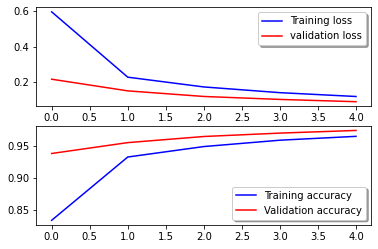

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)